Step 1: Data Loading and Extraction

In [54]:
import zipfile
import os

# Define the path to the zip file
zip_file_path = '/content/archive.zip'

# Create a directory to extract the contents
extract_dir = '/content/extracted_files'
os.makedirs(extract_dir, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Data extraction completed.")


Data extraction completed.


Step 2: Data Loading into DataFrames

In [55]:
import pandas as pd

# Define the paths to the CSV files
validation_csv_path = os.path.join(extract_dir, 'twitter_validation.csv')
training_csv_path = os.path.join(extract_dir, 'twitter_training.csv')

# Load the CSV files into DataFrames
validation_df = pd.read_csv(validation_csv_path, encoding='utf-8')
training_df = pd.read_csv(training_csv_path, encoding='utf-8')

print("Data loading completed.")


Data loading completed.


Step 3: Correcting Column Names

In [56]:
# Rename columns for clarity
validation_df.columns = ['tweet_id', 'entity', 'sentiment', 'content']
training_df.columns = ['tweet_id', 'entity', 'sentiment', 'content']

print("Column renaming completed.")


Column renaming completed.


Step 4: Exploratory Data Analysis (EDA)

Summary Statistics

In [57]:
# Display basic information about the datasets
print("Validation DataFrame info:")
print(validation_df.info())
print("\nTraining DataFrame info:")
print(training_df.info())

# Display basic statistics for numerical columns
print("\nValidation DataFrame describe:")
print(validation_df.describe())
print("\nTraining DataFrame describe:")
print(training_df.describe())

# Display counts of unique values in categorical columns
print("\nValidation DataFrame value counts:")
print(validation_df['sentiment'].value_counts())
print(validation_df['entity'].value_counts())

print("\nTraining DataFrame value counts:")
print(training_df['sentiment'].value_counts())
print(training_df['entity'].value_counts())


Validation DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   999 non-null    int64 
 1   entity     999 non-null    object
 2   sentiment  999 non-null    object
 3   content    999 non-null    object
dtypes: int64(1), object(3)
memory usage: 31.3+ KB
None

Training DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   74681 non-null  int64 
 1   entity     74681 non-null  object
 2   sentiment  74681 non-null  object
 3   content    73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None

Validation DataFrame describe:
           tweet_id
count    999.000000
mean    6435.159159
std     3728.912226
min        6.000000
25%     3241.500000
50% 

Missing Values

In [58]:
# Check for missing values in each DataFrame
print("\nValidation DataFrame missing values:")
print(validation_df.isnull().sum())

print("\nTraining DataFrame missing values:")
print(training_df.isnull().sum())



Validation DataFrame missing values:
tweet_id     0
entity       0
sentiment    0
content      0
dtype: int64

Training DataFrame missing values:
tweet_id       0
entity         0
sentiment      0
content      686
dtype: int64


Step 5: Data Cleaning and Preparation


In [59]:
# Fill missing values
validation_df['content'].fillna('', inplace=True)
training_df['content'].fillna('', inplace=True)

# Remove duplicates
validation_df.drop_duplicates(inplace=True)
training_df.drop_duplicates(inplace=True)

print("Data cleaning and preparation completed.")


Data cleaning and preparation completed.


Step 6: Sentiment Analysis Setup

In [60]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

# Initialize the VADER sentiment intensity analyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Step 7: Perform Sentiment Analysis

In [61]:
# Function to analyze sentiment, handling non-string values
def analyze_sentiment(text):
    if not isinstance(text, str) or text == '':
        return None
    return sid.polarity_scores(text)['compound']

# Apply sentiment analysis to the 'content' column, handling potential errors
validation_df['sentiment_score'] = validation_df['content'].apply(analyze_sentiment)
training_df['sentiment_score'] = training_df['content'].apply(analyze_sentiment)


Step 8: Advanced EDA

Visualize Sentiment Distribution

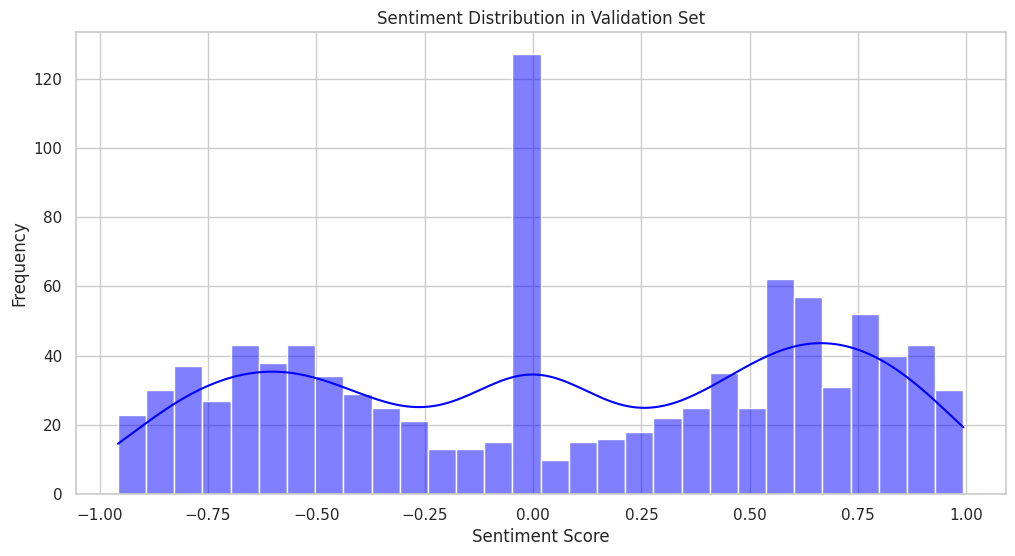

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Plot sentiment distribution for the validation set
plt.figure(figsize=(12, 6))
sns.histplot(validation_df['sentiment_score'], bins=30, kde=True, color='blue')
plt.title('Sentiment Distribution in Validation Set')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

Visualize Sentiment by Topic

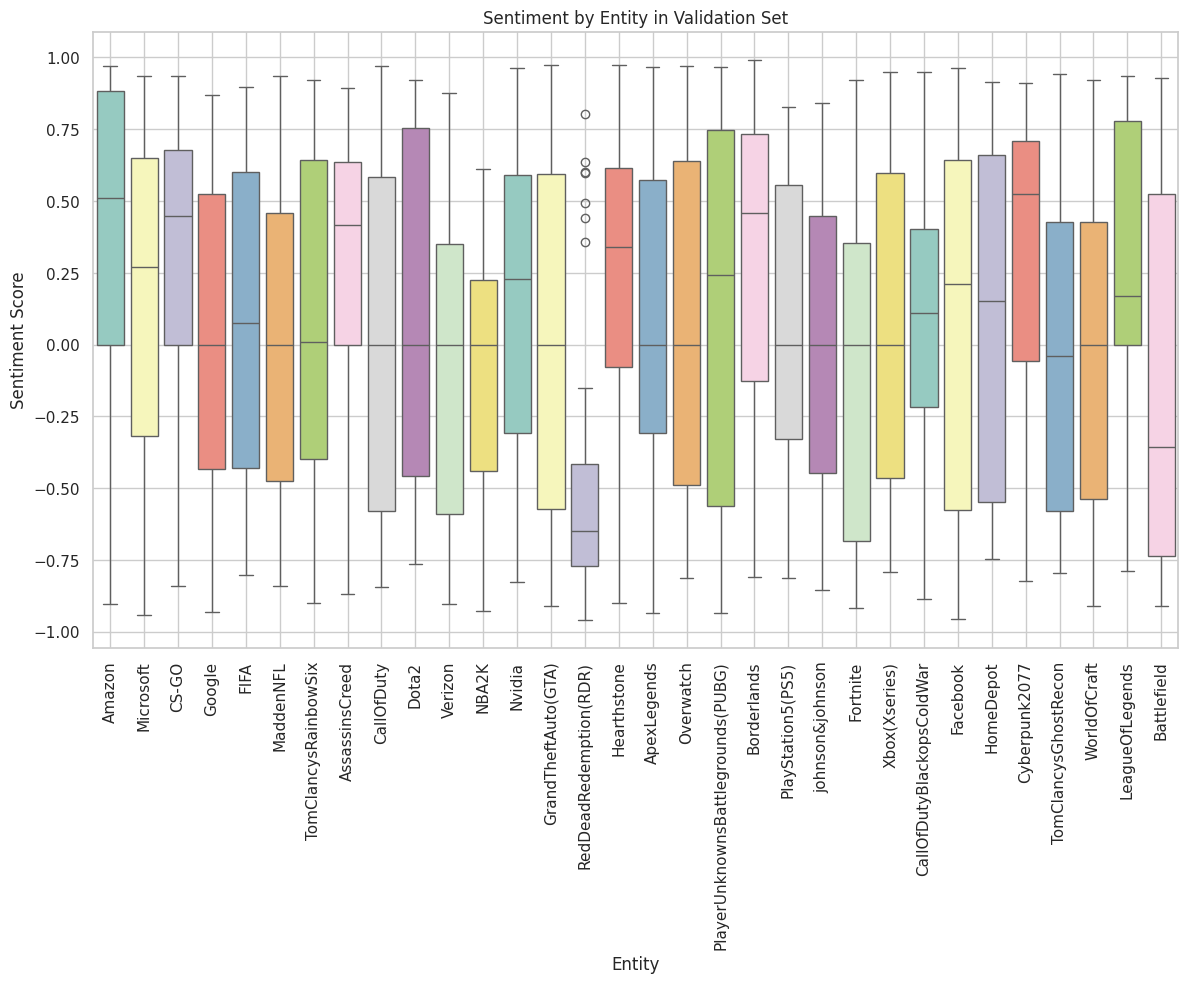

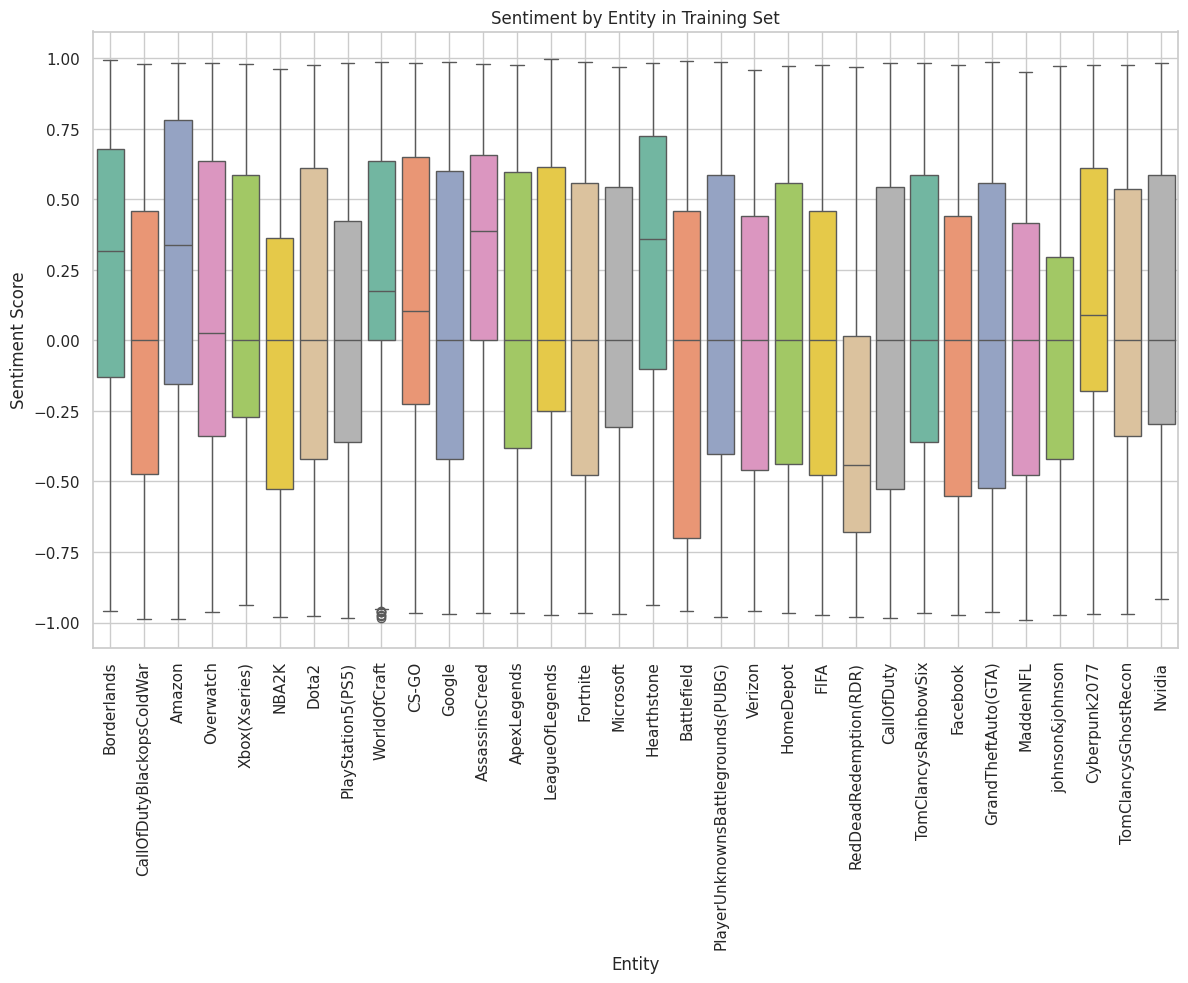

In [63]:
# Plot sentiment by entity in the validation set
plt.figure(figsize=(14, 8))
sns.boxplot(x='entity', y='sentiment_score', hue='entity', data=validation_df, palette="Set3", legend=False)
plt.title('Sentiment by Entity in Validation Set')
plt.xlabel('Entity')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Plot sentiment by entity in the training set
plt.figure(figsize=(14, 8))
sns.boxplot(x='entity', y='sentiment_score', hue='entity', data=training_df, palette="Set2", legend=False)
plt.title('Sentiment by Entity in Training Set')
plt.xlabel('Entity')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

Visualize Sentiment by Label

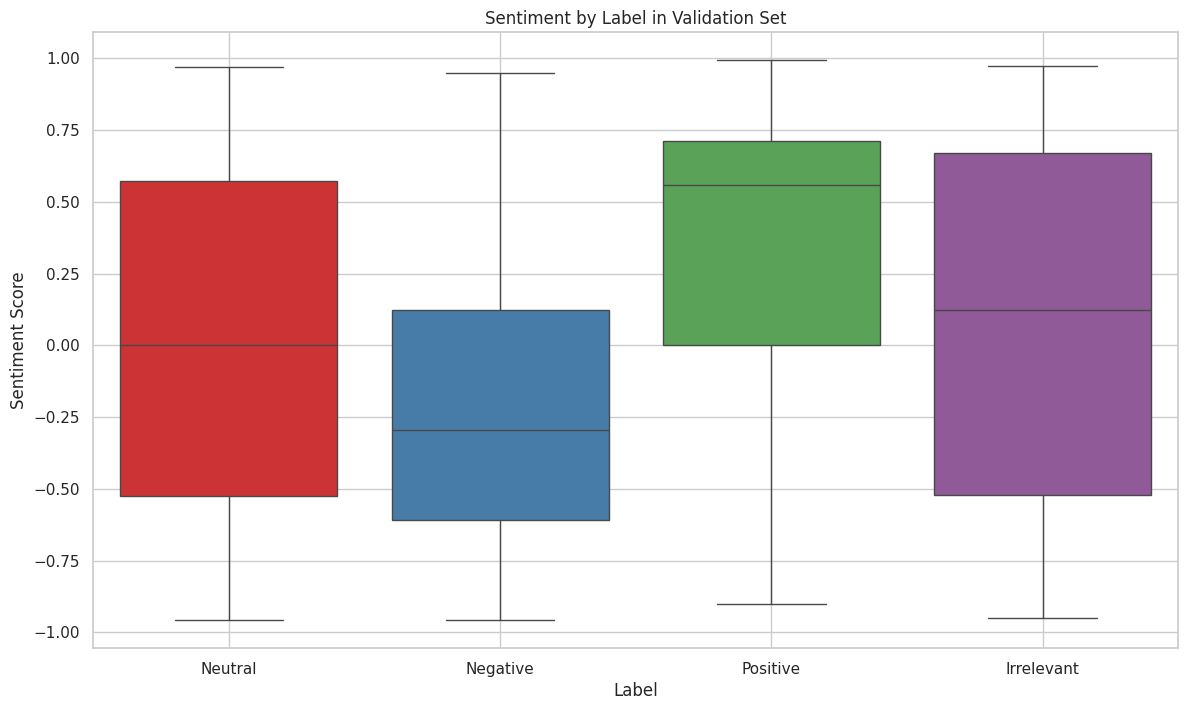

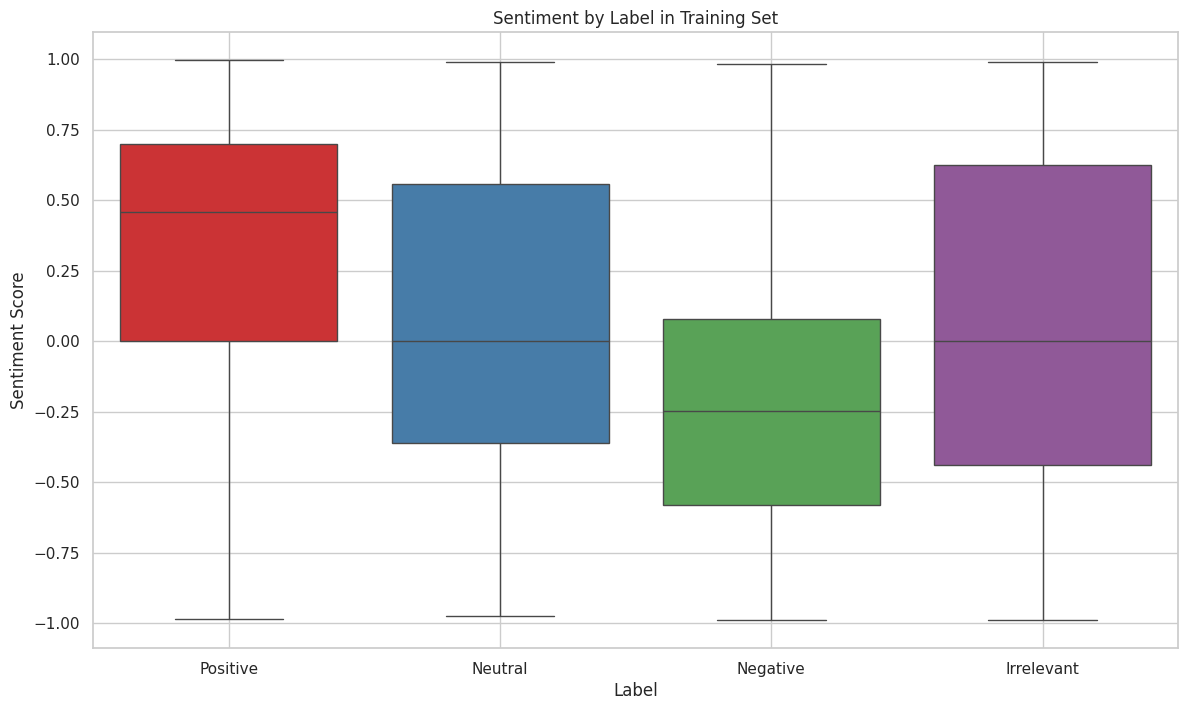

In [64]:
# Sentiment distribution by label in the validation set
plt.figure(figsize=(14, 8))
sns.boxplot(x='sentiment', y='sentiment_score', hue='sentiment', data=validation_df, palette="Set1", legend=False)
plt.title('Sentiment by Label in Validation Set')
plt.xlabel('Label')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.show()


# Sentiment distribution by label in the training set
plt.figure(figsize=(14, 8))
sns.boxplot(x='sentiment', y='sentiment_score', hue='sentiment', data=training_df, palette="Set1", legend=False)
plt.title('Sentiment by Label in Training Set')
plt.xlabel('Label')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.show()

Step 9: Visualize Scatter Plot for Sentiment Scores

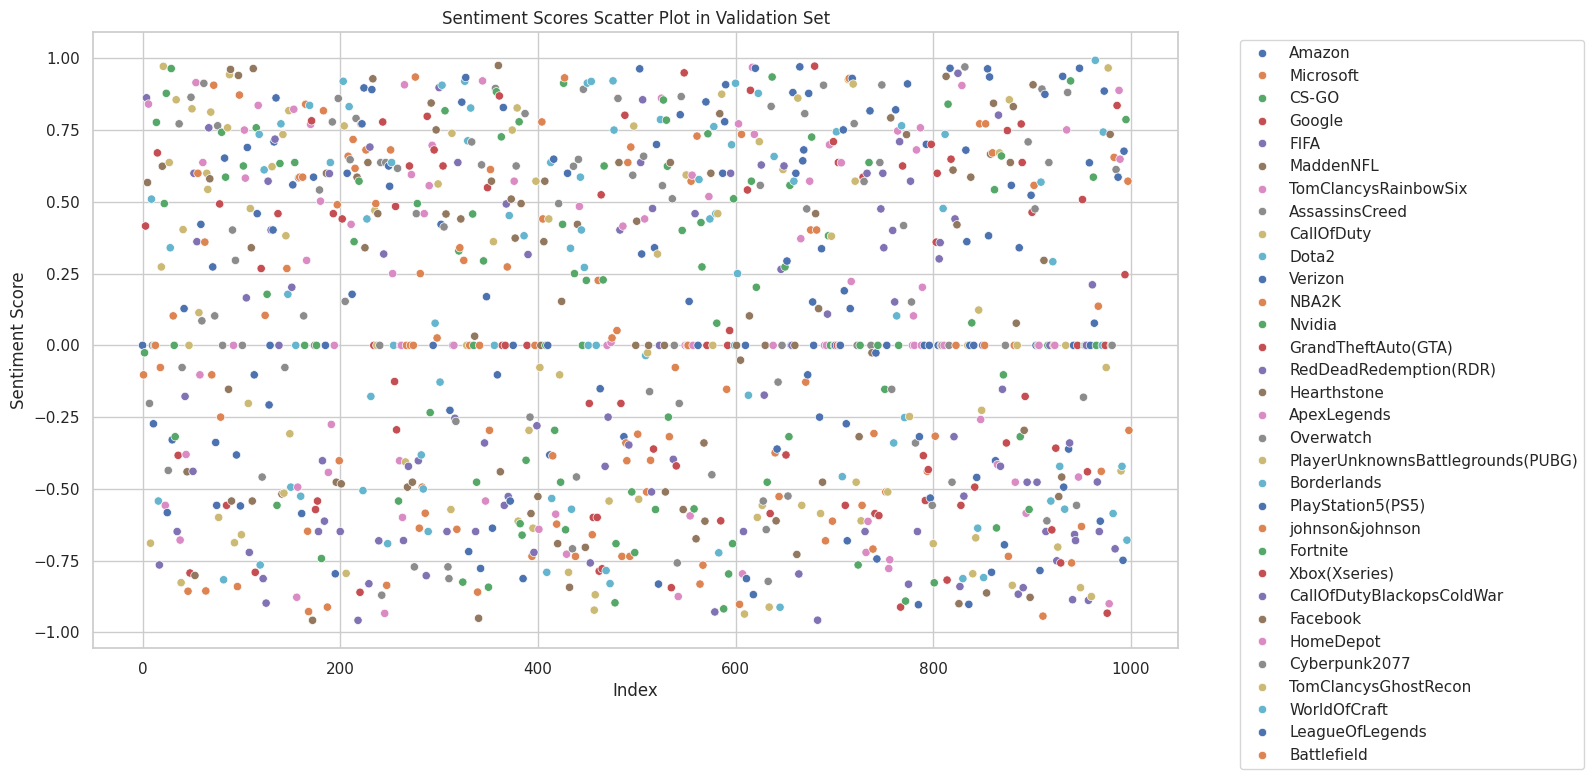

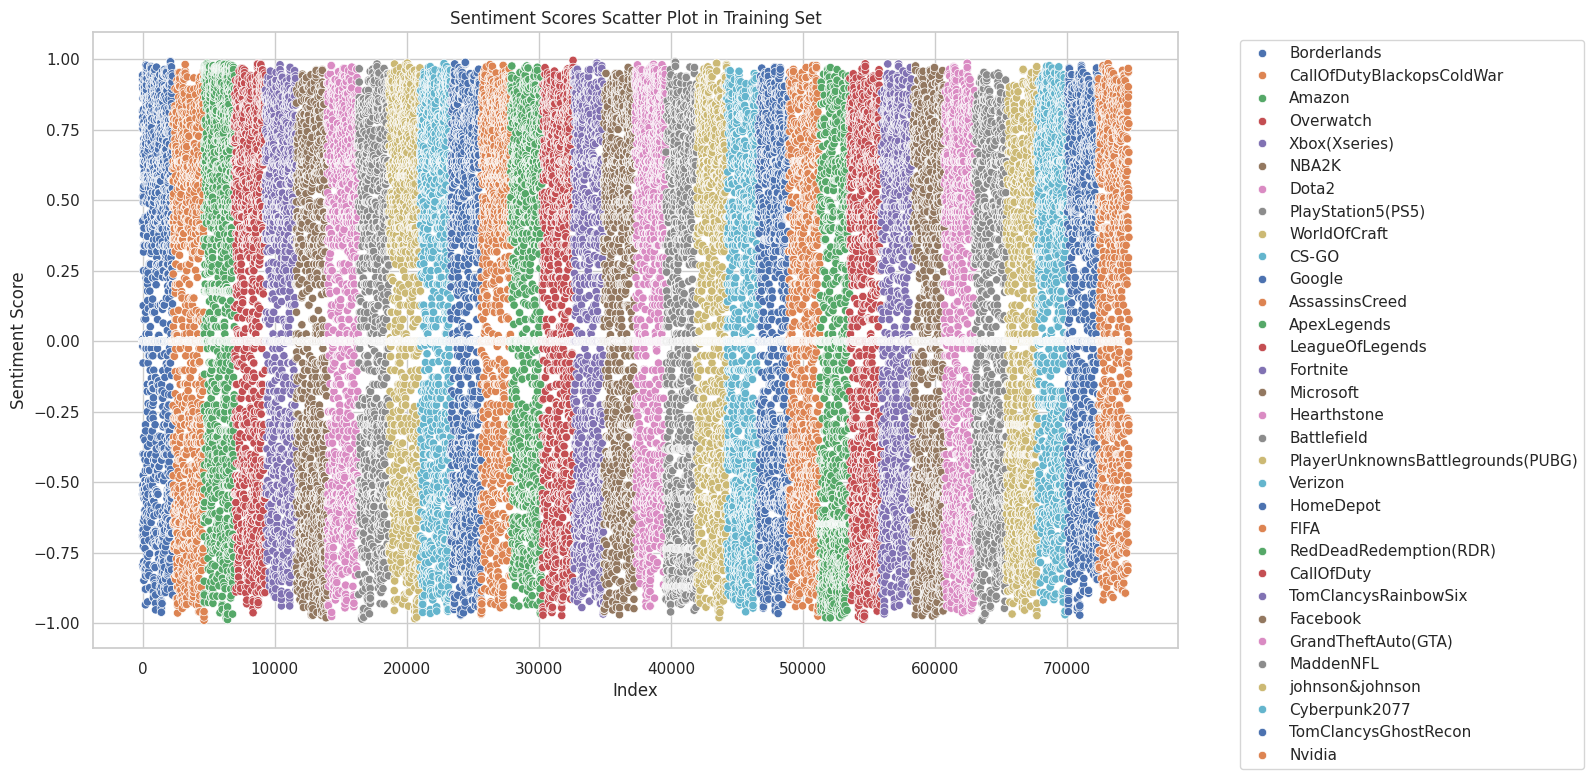

Sentiment scores scatter plot visualization completed.


In [65]:
# Scatter plot for sentiment scores in the validation set
plt.figure(figsize=(14, 8))
sns.scatterplot(x=validation_df.index, y='sentiment_score', hue='entity', data=validation_df, palette="deep")
plt.title('Sentiment Scores Scatter Plot in Validation Set')
plt.xlabel('Index')
plt.ylabel('Sentiment Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Scatter plot for sentiment scores in the training set
plt.figure(figsize=(14, 8))
sns.scatterplot(x=training_df.index, y='sentiment_score', hue='entity', data=training_df, palette="deep")
plt.title('Sentiment Scores Scatter Plot in Training Set')
plt.xlabel('Index')
plt.ylabel('Sentiment Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


Step 10: Handling Imbalanced Data

Resampling Techniques

In [66]:
from sklearn.utils import resample

# Separate majority and minority classes for training set
positive_df = training_df[training_df.sentiment == 'Positive']
negative_df = training_df[training_df.sentiment == 'Negative']
neutral_df = training_df[training_df.sentiment == 'Neutral']

# Downsample majority classes
positive_downsampled = resample(positive_df,
                                replace=False,    # sample without replacement
                                n_samples=len(neutral_df),     # to match minority class
                                random_state=123) # reproducible results
negative_downsampled = resample(negative_df,
                                replace=False,
                                n_samples=len(neutral_df),
                                random_state=123)

# Combine minority class with downsampled majority class
training_df_balanced = pd.concat([neutral_df, positive_downsampled, negative_downsampled])

# Display new class counts
print(training_df_balanced['sentiment'].value_counts())


sentiment
Neutral     17800
Positive    17800
Negative    17800
Name: count, dtype: int64


Step 11: Model Training and Evaluation

Data Preparation for Modeling

In [67]:
from sklearn.model_selection import train_test_split

# Features and Labels
X_train = training_df_balanced['content']
y_train = training_df_balanced['sentiment']
X_val = validation_df['content']
y_val = validation_df['sentiment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


Text Vectorization

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize text data
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
X_val_tfidf = vectorizer.transform(X_val)


Model Training

In [69]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

Model Evaluation

In [70]:
from sklearn.metrics import classification_report, accuracy_score
# Predictions
y_pred_train = model.predict(X_train_tfidf)
y_pred_test = model.predict(X_test_tfidf)
y_pred_val = model.predict(X_val_tfidf)

# Evaluation
print("Training set evaluation:")
print(classification_report(y_train, y_pred_train, zero_division=0))
print("Accuracy:", accuracy_score(y_train, y_pred_train))

print("\nTest set evaluation:")
print(classification_report(y_test, y_pred_test, zero_division=0))
print("Accuracy:", accuracy_score(y_test, y_pred_test))

print("\nValidation set evaluation:")
print(classification_report(y_val, y_pred_val, zero_division=0))
print("Accuracy:", accuracy_score(y_val, y_pred_val))

Training set evaluation:
              precision    recall  f1-score   support

    Negative       0.99      0.97      0.98     14274
     Neutral       0.95      0.99      0.97     14262
    Positive       0.98      0.97      0.98     14184

    accuracy                           0.98     42720
   macro avg       0.98      0.98      0.98     42720
weighted avg       0.98      0.98      0.98     42720

Accuracy: 0.9752106741573033

Test set evaluation:
              precision    recall  f1-score   support

    Negative       0.91      0.90      0.91      3526
     Neutral       0.90      0.91      0.90      3538
    Positive       0.90      0.89      0.89      3616

    accuracy                           0.90     10680
   macro avg       0.90      0.90      0.90     10680
weighted avg       0.90      0.90      0.90     10680

Accuracy: 0.901498127340824

Validation set evaluation:
              precision    recall  f1-score   support

  Irrelevant       0.00      0.00      0.00       1

Step 12: Advanced  Visualizations

Sentiment Distribution by Label with More Colors

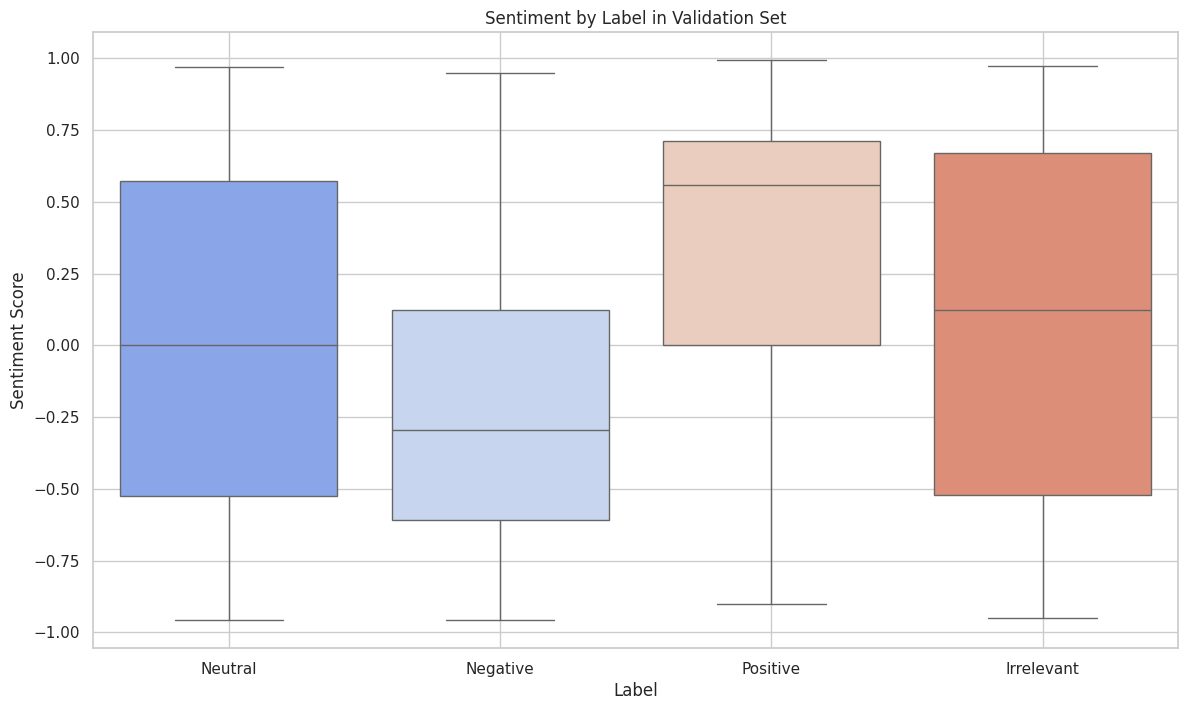

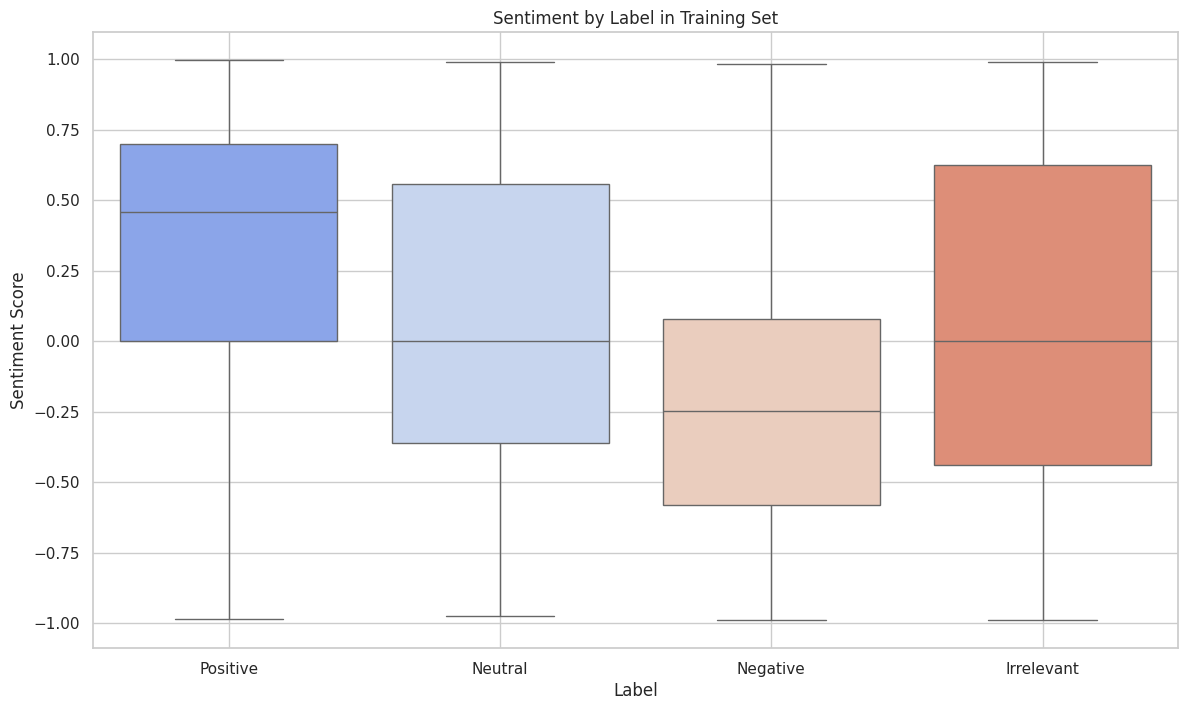

In [71]:
# Sentiment distribution by label in the validation set with more colors
plt.figure(figsize=(14, 8))
sns.boxplot(x='sentiment', y='sentiment_score', hue='sentiment', data=validation_df, palette="coolwarm", legend=False)
plt.title('Sentiment by Label in Validation Set')
plt.xlabel('Label')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.show()


# Sentiment distribution by label in the training set with more colors
plt.figure(figsize=(14, 8))
sns.boxplot(x='sentiment', y='sentiment_score', hue='sentiment', data=training_df, palette="coolwarm", legend=False)
plt.title('Sentiment by Label in Training Set')
plt.xlabel('Label')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.show()


Heatmap of Sentiment Distribution by Entity

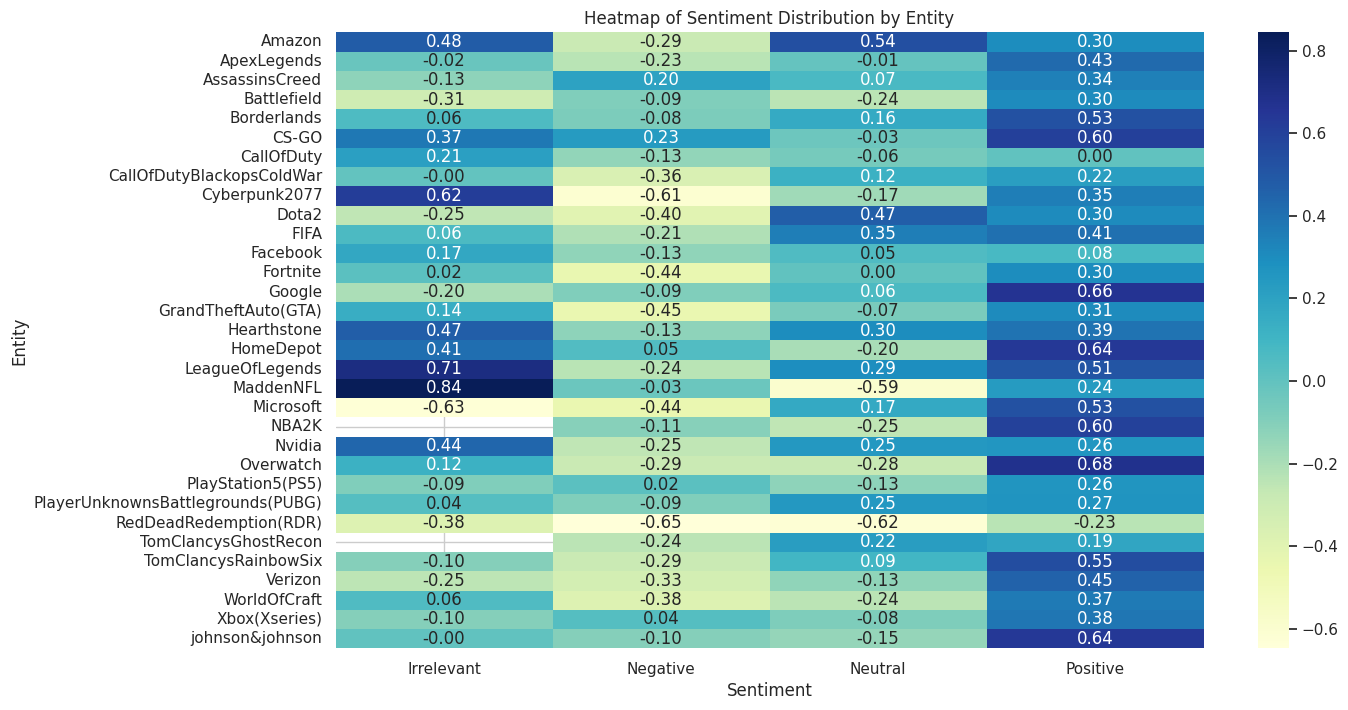

In [72]:
# Pivot table for sentiment scores by entity
pivot_df = validation_df.pivot_table(index='entity', columns='sentiment', values='sentiment_score', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Heatmap of Sentiment Distribution by Entity')
plt.xlabel('Sentiment')
plt.ylabel('Entity')
plt.show()

Word Cloud for Each Sentiment

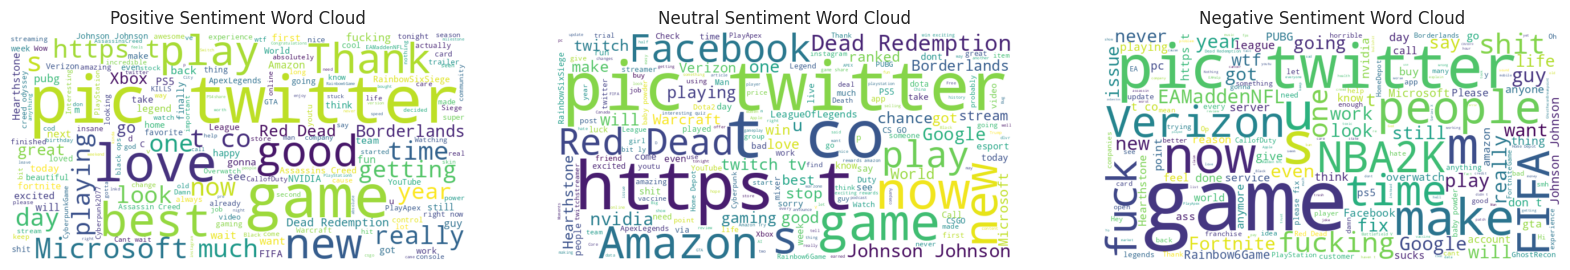

In [73]:
from wordcloud import WordCloud

# Function to generate word cloud
def generate_word_cloud(df, sentiment):
    text = " ".join(content for content in df[df['sentiment'] == sentiment]['content'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    return wordcloud

# Generate word clouds
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.imshow(generate_word_cloud(validation_df, 'Positive'), interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(generate_word_cloud(validation_df, 'Neutral'), interpolation='bilinear')
plt.title('Neutral Sentiment Word Cloud')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(generate_word_cloud(validation_df, 'Negative'), interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')

plt.show()